In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sunpy.map
from astropy.visualization import AsinhStretch, ImageNormalize
from sunpy.visualization.colormaps import cm

Observatory,SDO
Instrument,AIA 2
Detector,AIA
Measurement,193.0 Angstrom
Wavelength,193.0 Angstrom
Observation Date,2025-09-13 12:07:04
Exposure Time,1.9996429999999998 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.60071403 0.60071403] arcsec / pix
Reference Pixel,[2040.21375 2043.50269] pix

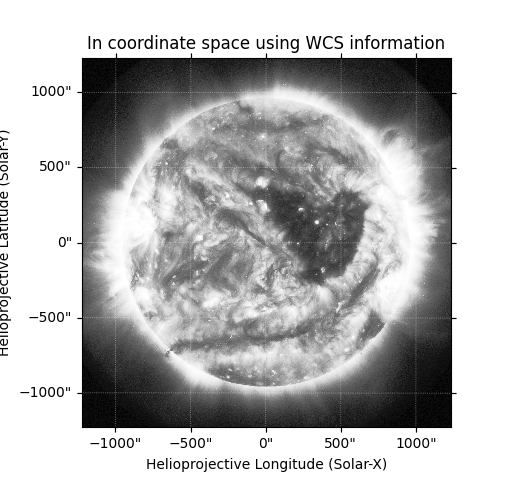
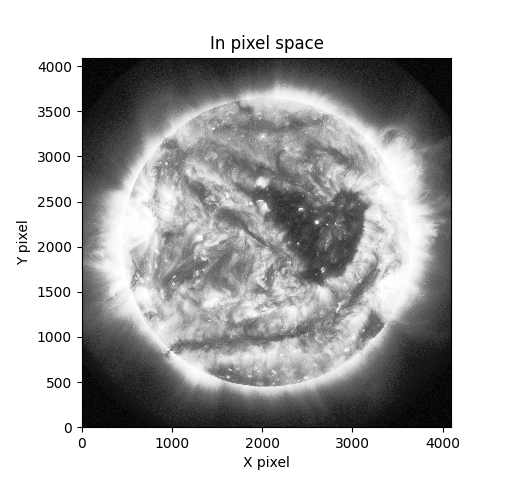
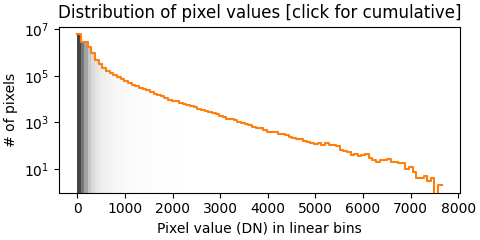
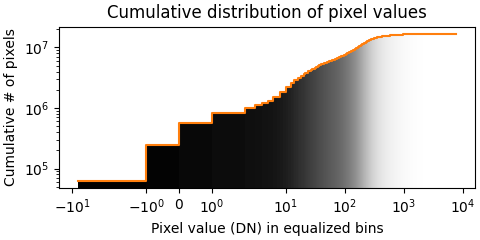

In [33]:
aia = sunpy.map.Map("/home/zorinep/project/data/fits/coronal_hole/aia.lev1_euv_12s.2025-09-13T120706Z.193.image_lev1.fits")
aia

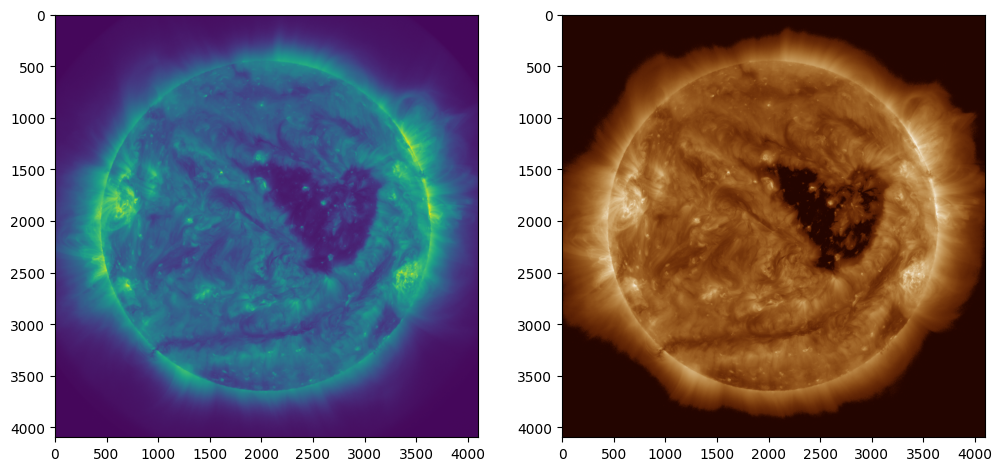

In [112]:
norm = ImageNormalize(stretch=AsinhStretch(0.01), clip=True)
percentile = 30

img = aia.data[::-1, :]
fit, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, norm=norm)
staled = np.where((img>np.percentile(img, percentile)), img, 0)
ax[1].imshow(staled, norm=norm, cmap=cm.sdoaia193)
plt.show()

In [ ]:
aia = sunpy.map.Map("/home/zorinep/project/data/fits/coronal_hole/aia.lev1_euv_12s.2014-04-13T002832Z.193.image_lev1.fits")
norm = ImageNormalize(stretch=AsinhStretch(0.01), clip=True)
vmin, vmax = 50, 3000   


aia.plot(cmap=cm.sdoaia193, norm=norm, vmin=vmin, vmax=vmax, title=None)
plt.axis('off')
plt.savefig("result.jpg", bbox_inches='tight', pad_inches=0, dpi=150)
plt.close()

In [146]:
from PIL import Image

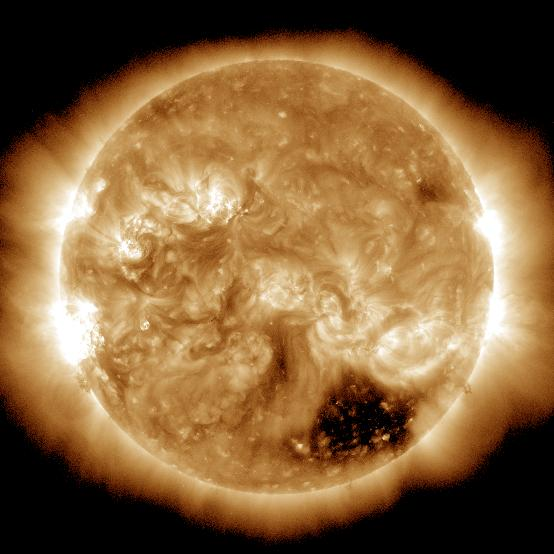

In [147]:
img = Image.open("/home/zorinep/project/notebooks/result.jpg")
img